<a href="https://colab.research.google.com/github/PrateekTh/development-based-clustering-countries/blob/main/country_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Data = pd.read_csv("/content/drive/MyDrive/input/country-analysis/Country_Data.csv")

In [2]:
df = pd.DataFrame(Data)
df.shape

(167, 10)

##Provided Data Details

This is the description of the columns of the dataset:


1. **country**: Names of the countries 🌍🏞️ (167 countries)

2. **child_mort**: Death of children under 5 years of age per 1000 live births 💔👶 (many values inside)

3. **exports**: Exports of goods and services per capita 📦💼, presented as a percentage of the GDP per capita 🌐💰 (many values inside)

4. **health**: Total health spending per capita 💉💰, presented as a percentage of GDP per capita 📊🌐 (many values inside)

5. **imports**: Imports of goods and services per capita 🌐. Given as a % of the GDP per capita 💰 (many values inside)

6. **income**: Net income per person 💵🌍 (many values inside)

7. **inflation**: The measurement of the annual growth rate of the total GDP 📈🌐 (many values inside)

8. **life_expec**: The average number of years a newborn child would live if current mortality patterns remain the same 🍼⌛️ (many values inside)

9. **total_fer**: The number of children that would be born to each woman if current age-fertility rates remain the same 🤰👶 (many values inside)

10. **gdpp**: The GDP per capita. Calculated as the total GDP divided by the total population 🌐💰 (many values inside)

In [3]:
for col in df:
    print(f"{col:10} has {df[col].nunique():5} unique values")

country    has   167 unique values
child_mort has   139 unique values
exports    has   147 unique values
health     has   147 unique values
imports    has   151 unique values
income     has   156 unique values
inflation  has   156 unique values
life_expec has   127 unique values
total_fer  has   138 unique values
gdpp       has   157 unique values


In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


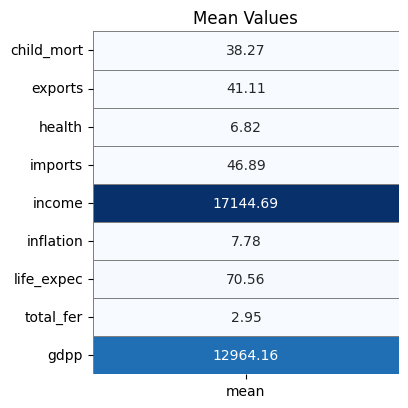

In [6]:
# mean values plotting:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))

colors = ['#FF69B4','#2D2926']

plt.subplot(1,1,1)

sns.heatmap(df.describe().T[['mean']],
            cmap = 'Blues',
            annot = True,
            fmt = '.2f',
            linecolor = 'Gray',
            linewidths = 0.7,
            cbar = False)

plt.title('Mean Values')

fig.tight_layout(pad=4)

In [7]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [8]:
col = list(df.columns)
col.remove('country')

categorical_features = ['country']
numerical_features = [*col]

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


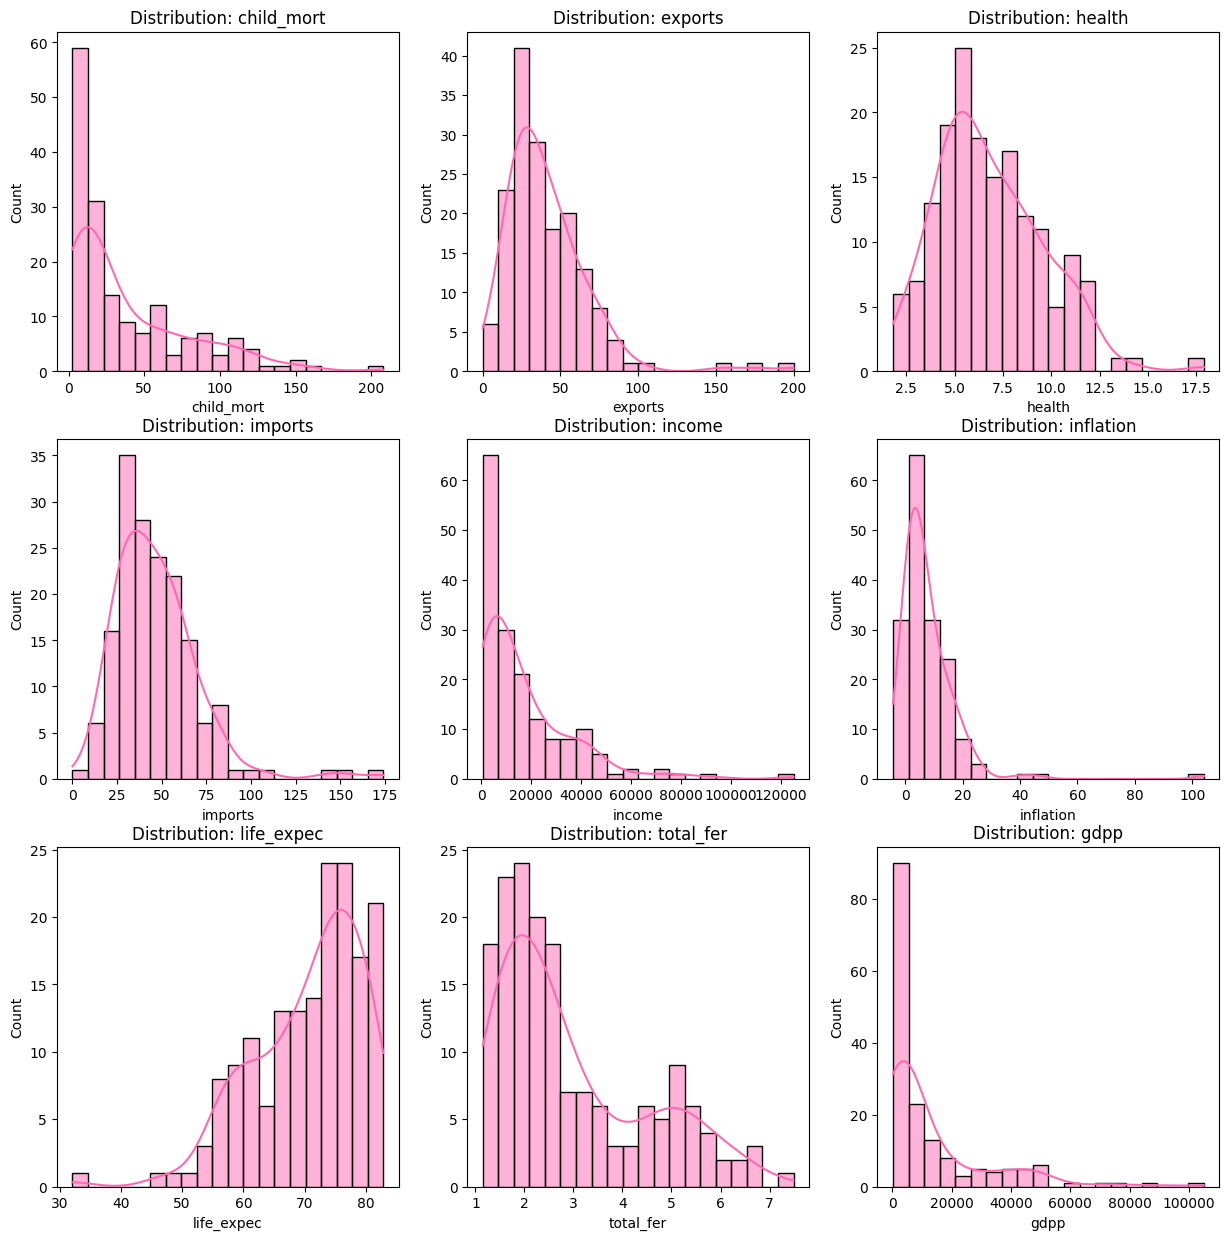

In [9]:
# distribution of features
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.histplot(data = df[numerical_features[i]], color=colors[0], kde=True, bins=20)
    title = 'Distribution: ' + numerical_features[i]
    plt.title(title)

plt.show()

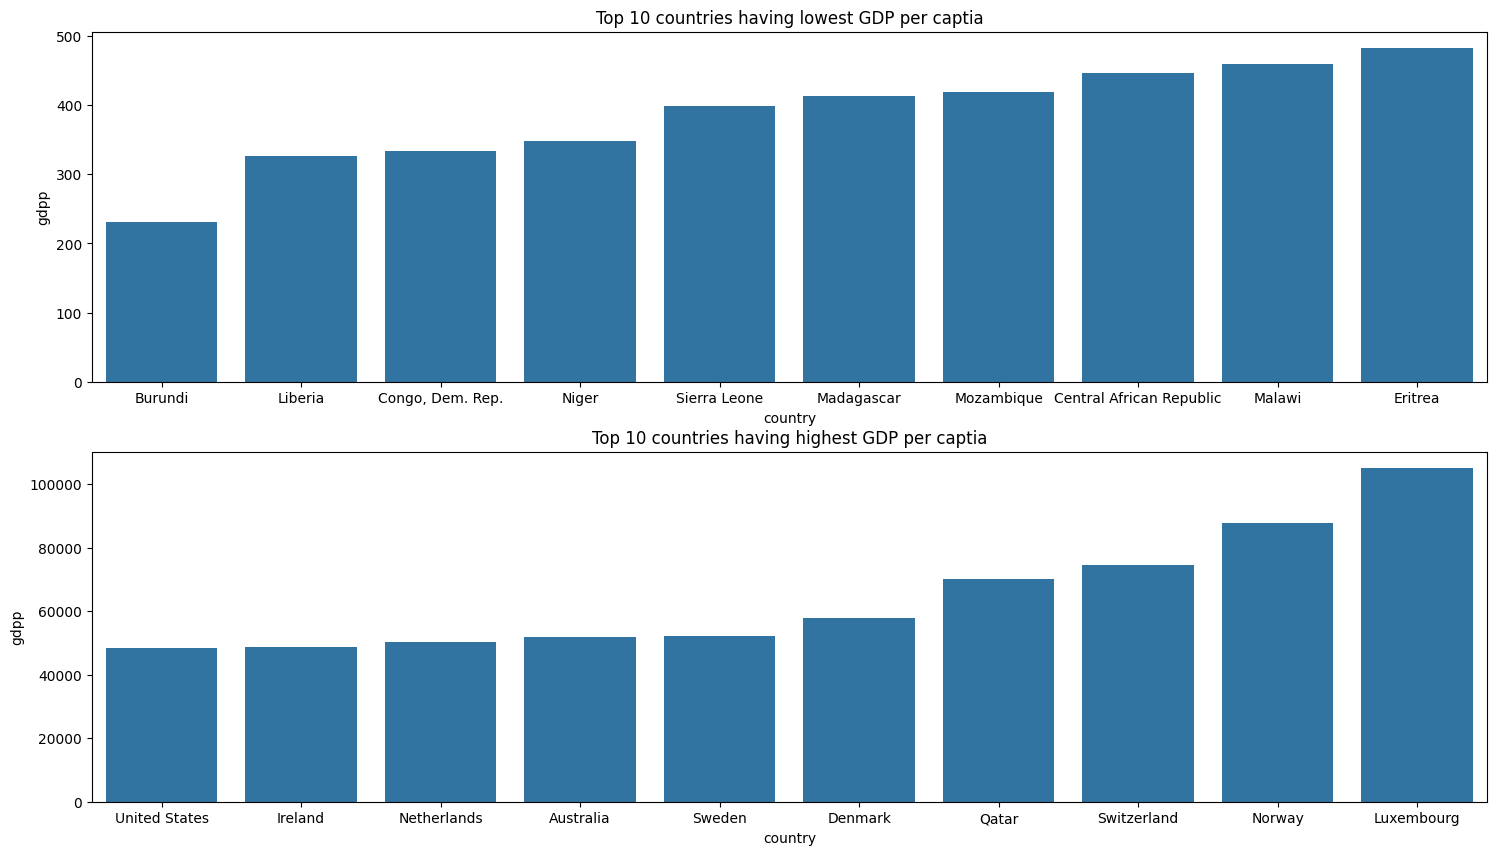

In [10]:
gdpp = df.sort_values(by=['gdpp'], ascending = True)

plt.figure(figsize=[18,10])

plt.subplot(2,1,1)
sns.barplot(x=gdpp['country'].head(10), y=gdpp['gdpp'].head(10))
plt.title('Top 10 countries having lowest GDP per captia')

plt.subplot(2,1,2)
sns.barplot(x=gdpp['country'].tail(10), y=gdpp['gdpp'].tail(10))
plt.title('Top 10 countries having highest GDP per captia')

plt.show()


In [11]:
# top 5 and bottom 5 countries of each category
def get5(col, return_df=False, place='Top'):

    c5 = df[['country',col]].sort_values(by=col, ascending=False)
    if place=='Top':
        c5=c5.head()
    elif place=='Bottom':
        c5=c5.tail()
    else:
        raise ValueError('place can be "Top" or "Bottom"')
    plt.figure(figsize=(7,4))
    plt.title(f'{place} 5 countries in {col} category')
    sns.barplot(data=c5, y='country', x=col)

    plt.show()
    if return_df:
        return top5

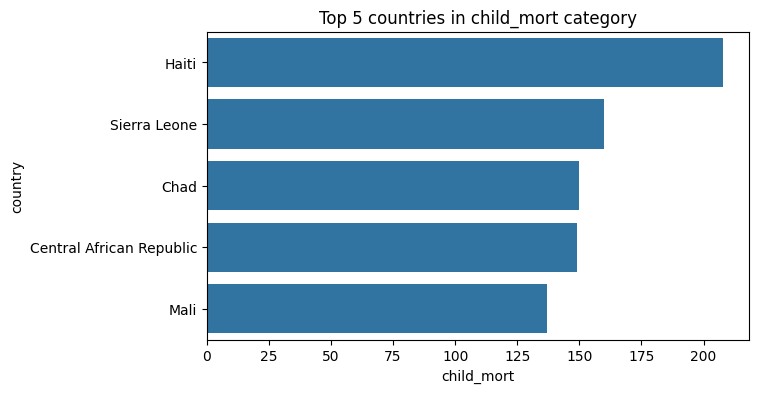

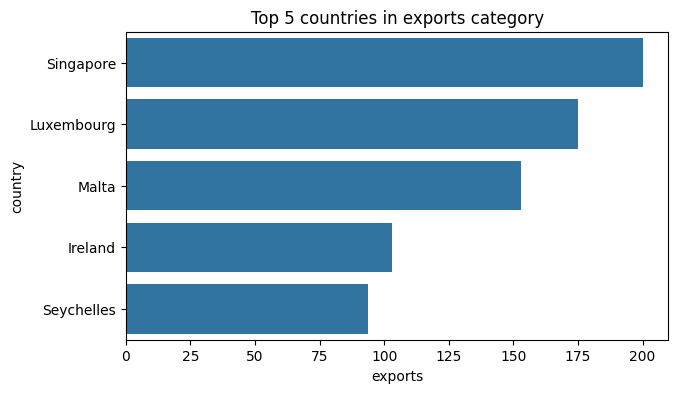

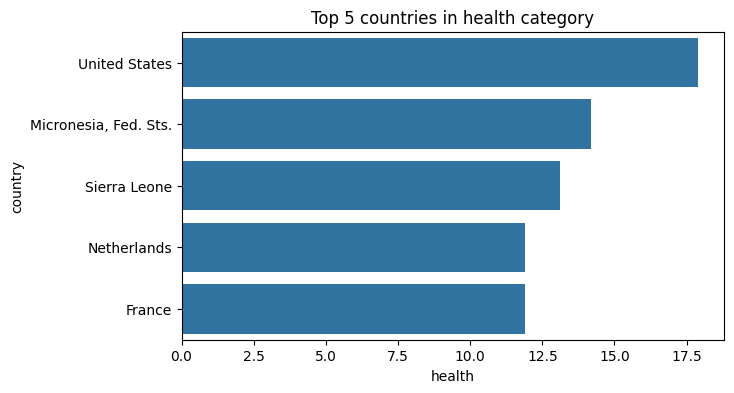

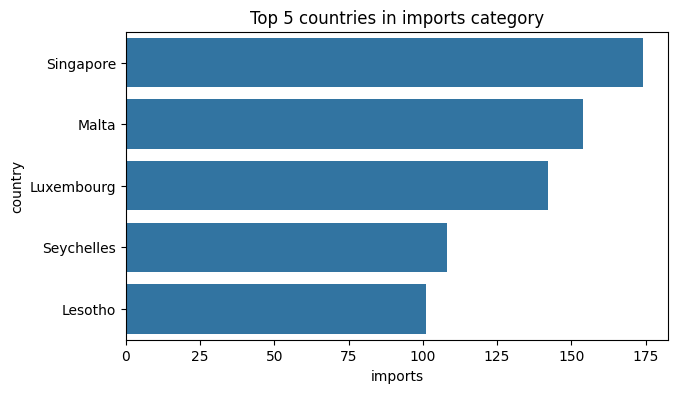

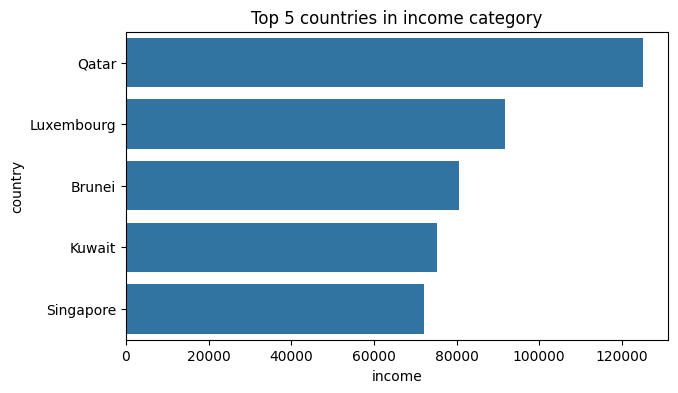

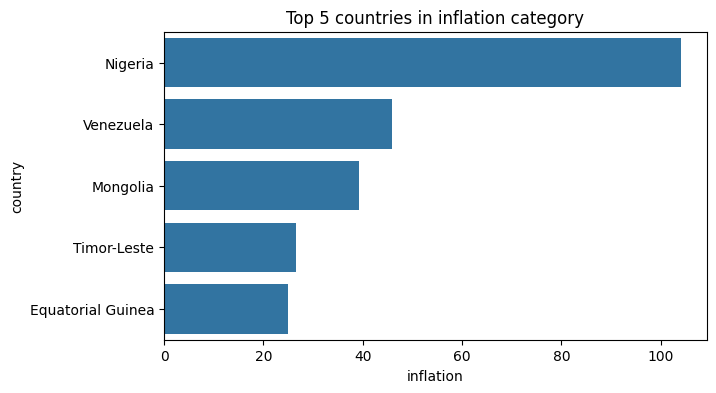

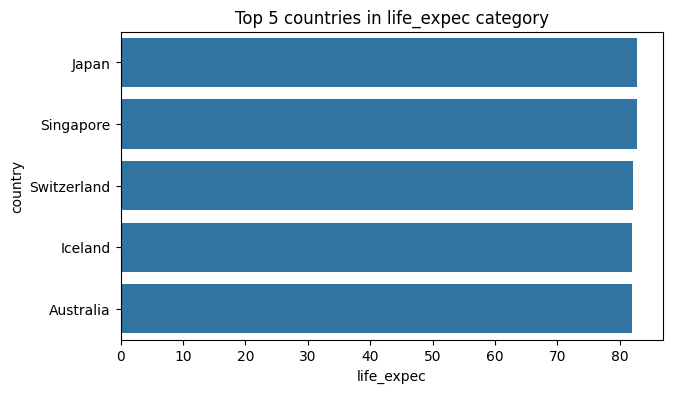

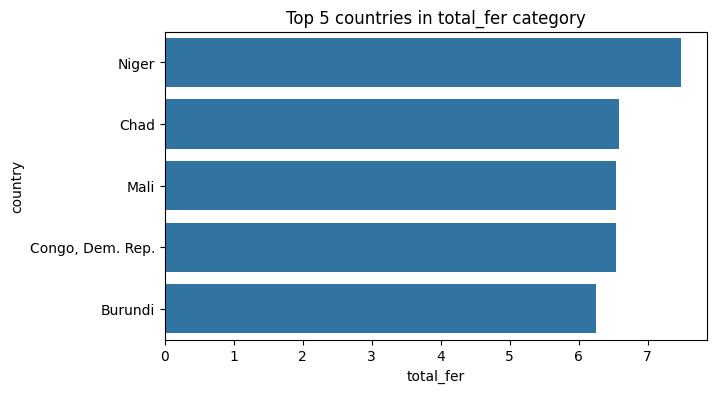

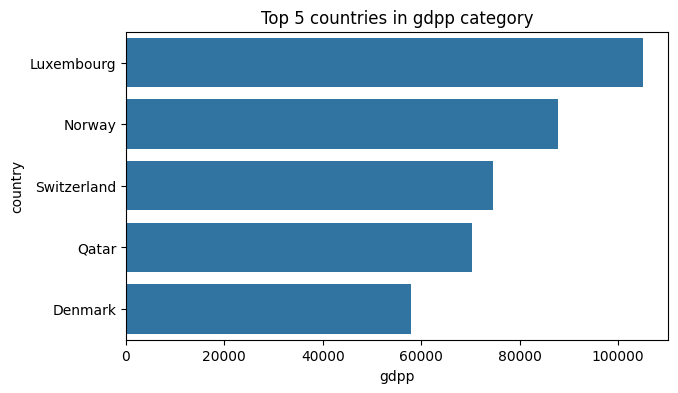

In [12]:
# Top 5 countries of each Category
for col in df.columns[1:]:
    get5(col)
    print('\n')

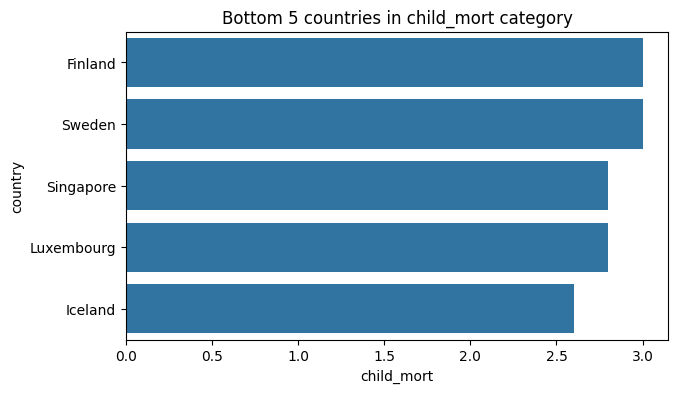

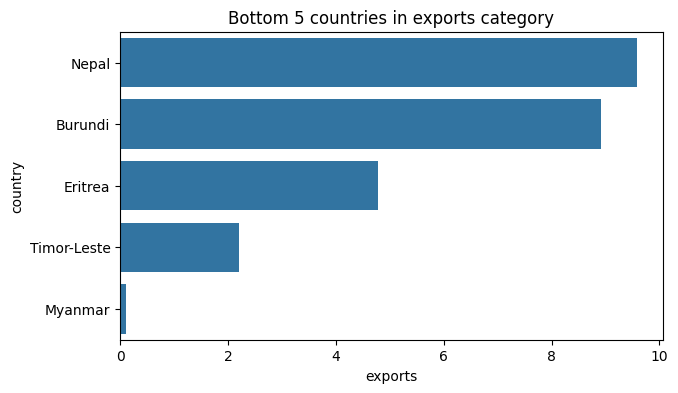

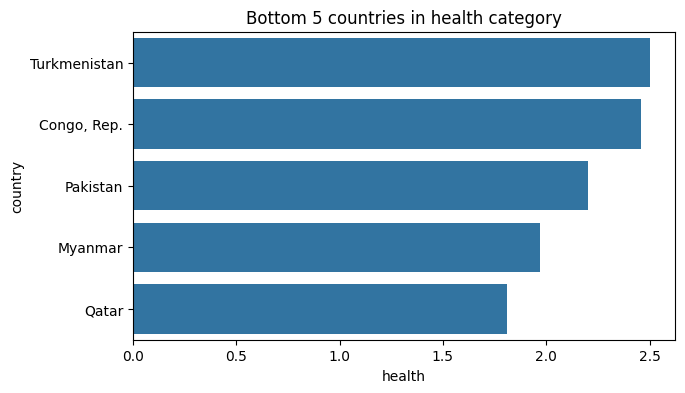

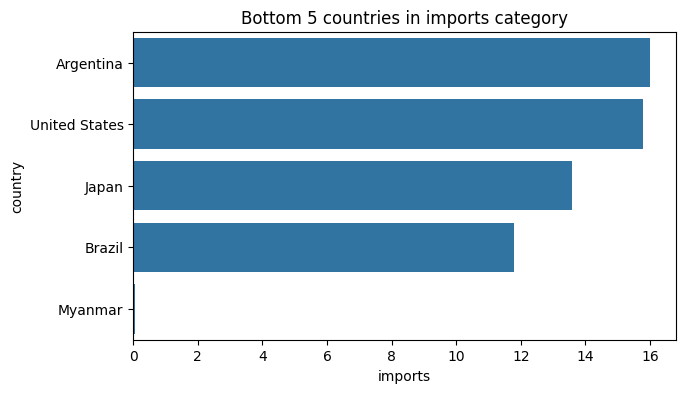

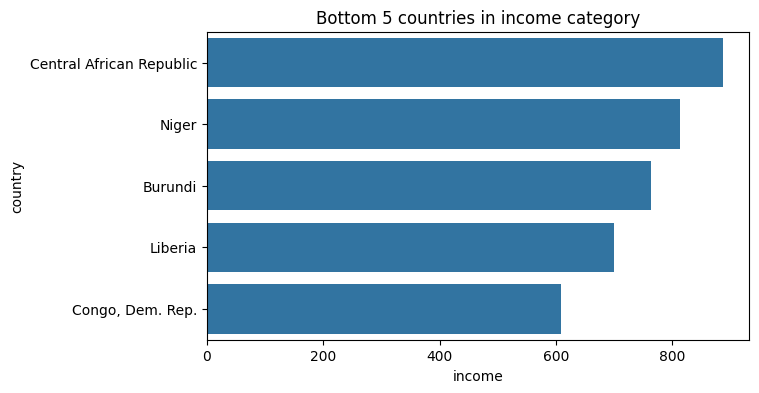

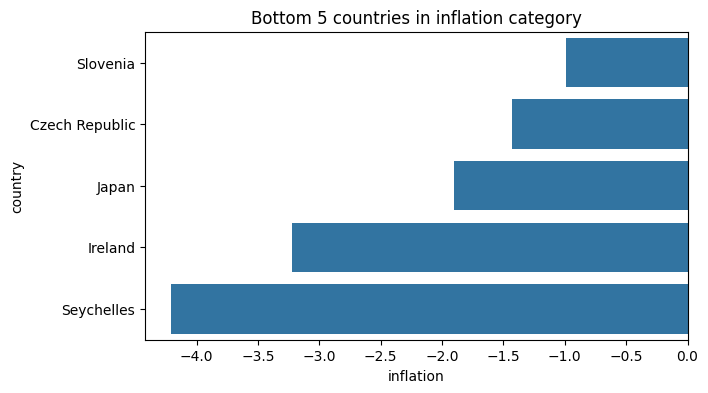

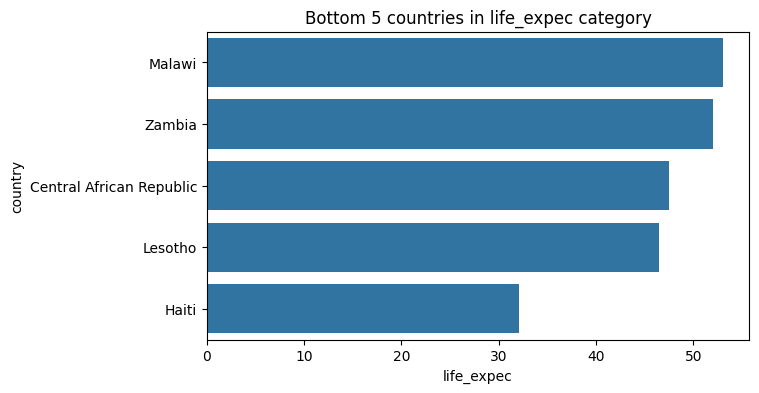

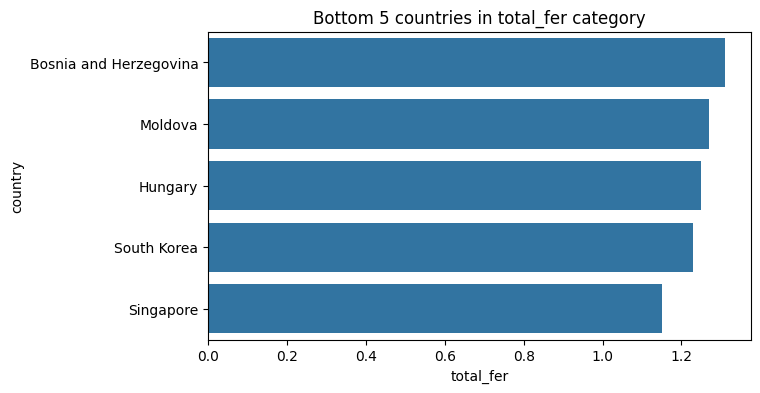

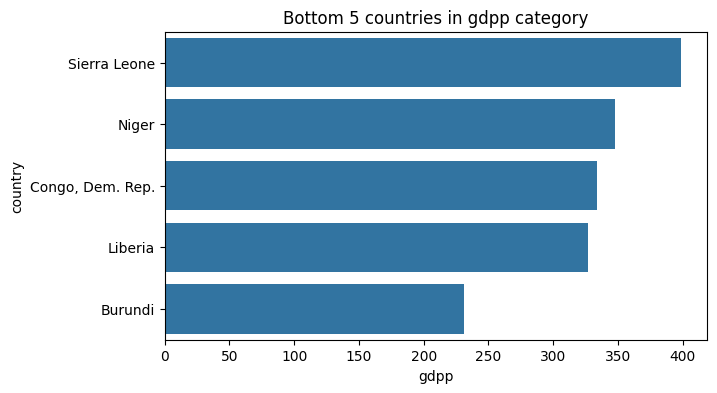

In [13]:
for col in df.columns[1:]:
    get5(col,place='Bottom')
    print('\n')

In [14]:
# for col in df.columns:
#     plt.figure(figsize=(6,3))
#     plt.scatter(df[col], df.index, label=col)
#     plt.title(f"Scatter plot of column {col}")
#     plt.legend()
#     plt.ylabel('index')
#     plt.xlabel(f"{col}")
#     plt.grid()
#     plt.show()

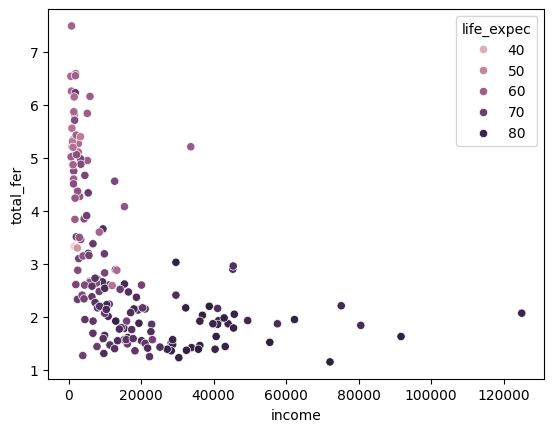

In [15]:
sns.scatterplot(data=df, x=df['income'], y=df['total_fer'], hue='life_expec')

plt.show()

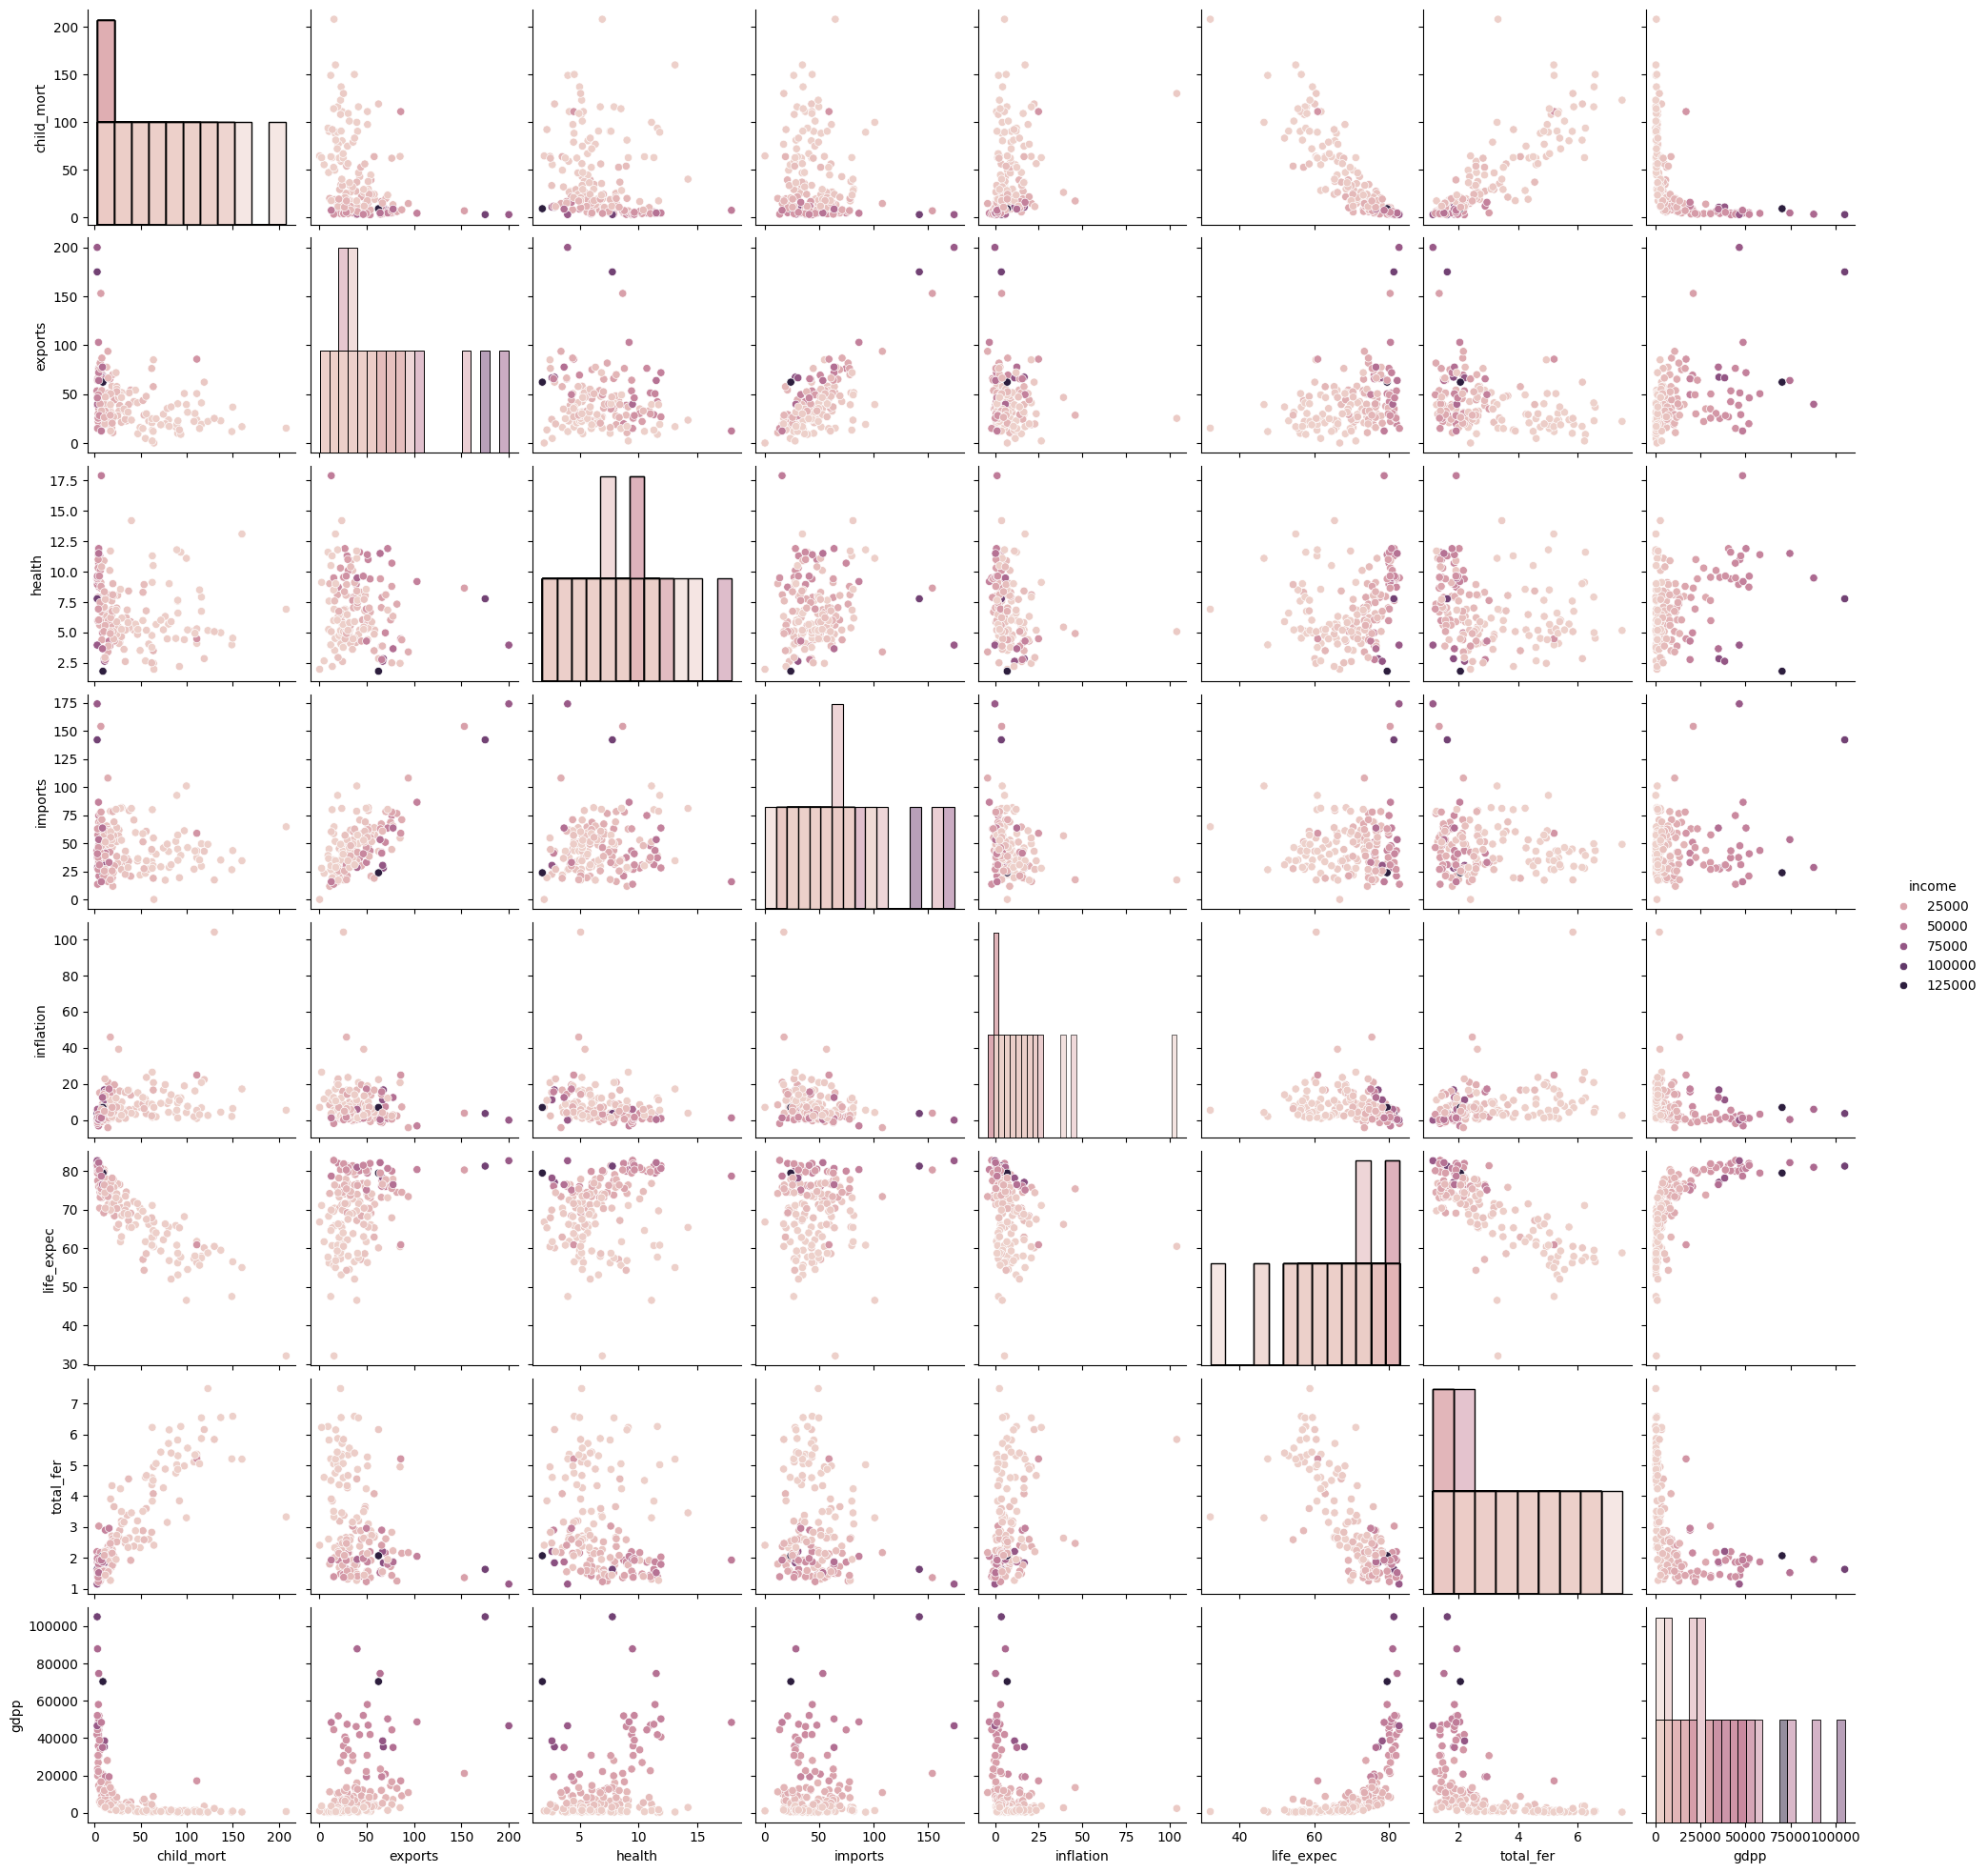

In [16]:
sns.pairplot(df, diag_kind="hist",  hue="income")

plt.show()

In [17]:
import plotly.graph_objects as go

fig = go.Figure()

for col in set(df.columns):
    fig.add_trace(go.Box(x=df[col], name=col))

fig.update_layout(title_text='Box plot (for outliers)',
                  title_font=dict(color='navy',family='newtimeroman',size=30),
                  title_x=0.45,
                  font=dict(color='navy',family='newtimeroman', size=20)
                 )
fig.show()

#Building the Model

In [18]:
# data modeling libraries
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import ward, dendrogram, linkage, cut_tree
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# model performance evaluation libraries
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA #0

In [19]:
df2 = df.drop(columns = ['country'])

# instantiating the scaler
scaler = StandardScaler()

# fit and transform
df_scale = scaler.fit_transform(df2)
df_scale.shape

(167, 9)

In [20]:
df_scale1 = pd.DataFrame(df_scale)
df_scale1.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_scale1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


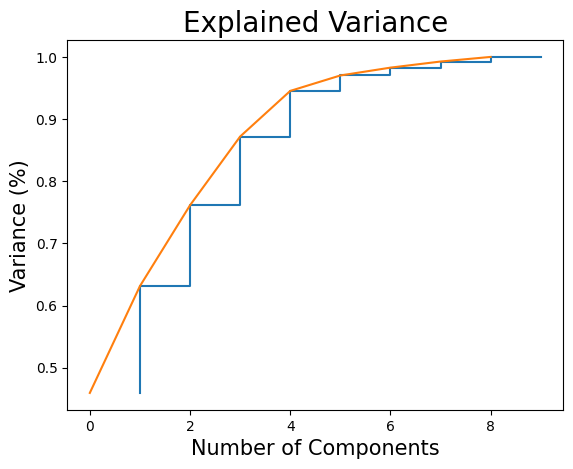

In [21]:
# pass through the scaled data set into our PCA class object
pca = PCA().fit(df_scale)

# plot the Cumulative Summation of the Explained Variance
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize=15)
plt.ylabel('Variance (%)', fontsize=15)
plt.title('Explained Variance', fontsize=20)

plt.show()

In [22]:
var_ratio = {}
for n in range(2,10):
    pca = PCA(n_components=n) #1 pca = PCA(n_components=2) #2&3 X_train = pca_fit_transfrom(X_train)          X_test = pca.transform(X_test)
    pca_components = pca.fit(df_scale)
    var_ratio[n] = sum(pca.explained_variance_ratio_) #4 explained_variance = pca.explained_variance_ratio_

var_ratio

{2: 0.6313336543771413,
 3: 0.7613762433466718,
 4: 0.871907861402391,
 5: 0.9453099756439513,
 6: 0.9701523224082288,
 7: 0.982756626389879,
 8: 0.9925694437691406,
 9: 1.0}

In [46]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [23]:
# we will choose 5 pca components and create a new dataset
final_pca = PCA(n_components=5).fit(df_scale)

reduced_cr=final_pca.fit_transform(df_scale)

# store it in a new data frame
country_pca = pd.DataFrame(data=reduced_cr, columns = ['principal component 1',
                                                       'principal component 2',
                                                       'principal component 3',
                                                       'principal component 4',
                                                       'principal component 5'
                                                      ])
country_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


In [24]:
col_list = df2.columns
col_list

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [48]:
final_pca.components_.T

array([[-0.41951945,  0.19288394, -0.02954353,  0.37065326, -0.16896968],
       [ 0.28389698,  0.61316349,  0.14476069,  0.00309102,  0.05761584],
       [ 0.15083782, -0.24308678, -0.59663237,  0.4618975 ,  0.51800037],
       [ 0.16148244,  0.67182064, -0.29992674, -0.07190746,  0.25537642],
       [ 0.39844111,  0.02253553,  0.3015475 ,  0.39215904, -0.2471496 ],
       [-0.19317293, -0.00840447,  0.64251951,  0.15044176,  0.7148691 ],
       [ 0.42583938, -0.22270674,  0.11391854, -0.20379723,  0.1082198 ],
       [-0.40372896,  0.15523311,  0.01954925,  0.37830365, -0.13526221],
       [ 0.39264482, -0.0460224 ,  0.12297749,  0.53199457, -0.18016662]])

In [25]:
pd.DataFrame(final_pca.components_.T, columns = ['PC_' + str(i) for i in range(5)], index=col_list)

,PC_0,PC_1,PC_2,PC_3,PC_4
child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970
exports,0.283897,0.613163,0.144761,0.003091,0.057616
health,0.150838,-0.243087,-0.596632,0.461897,0.518000
imports,0.161482,0.671821,-0.299927,-0.071907,0.255376
income,0.398441,0.022536,0.301548,0.392159,-0.247150
inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869
life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220
total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262
gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167


In [26]:
# Factor Analysis: variance explained by each component-
pd.Series(final_pca.explained_variance_ratio_, index=['PC_' + str(i) for i in range(5)])

PC_0    0.459517
PC_1    0.171816
PC_2    0.130043
PC_3    0.110532
PC_4    0.073402
dtype: float64

In [ ]:
# define a dictionary that contains all of our relevant info
results = []

# define how many clusters we want to test up to
num_of_clusters = 10

# run through each instance of K
for k in range(2, num_of_clusters):

    print("-" * 100)

    # create an instance of the model, and fit the training data to it
    kmeans = KMeans(n_clusters=k, random_state=0).fit(country_pca)

    results.append(kmeans.inertia_)

    # print the results
    print("Number of Clusters: {}".format(k),kmeans.inertia_)

#K-Means Algorithm on Reduced Dataset


In [28]:
kmeans_set={"init":"random", "n_init":10, "max_iter":300, "random_state":42}

cluster_range = range( 2, 10 )

cluster_errors = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, **kmeans_set) #** opens the dictionry
    kmeans.fit(country_pca)
    cluster_errors.append( kmeans.inertia_)

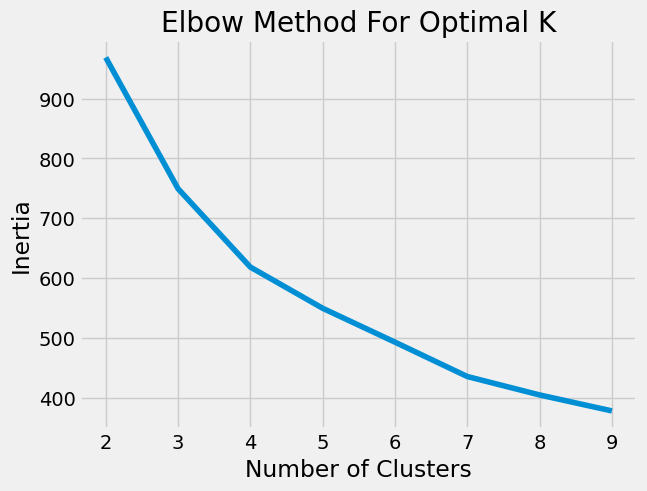

In [29]:
plt.style.use("fivethirtyeight")

plt.plot(range(2,10),cluster_errors)

plt.xticks(range(2,10))

plt.title('Elbow Method For Optimal K')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

In [30]:
df_kmeans_4 = df.copy()

In [31]:
# K-Means with 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=0).fit(country_pca)

df_kmeans_4['cluster'] = kmeans_4.labels_
df_kmeans_4.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


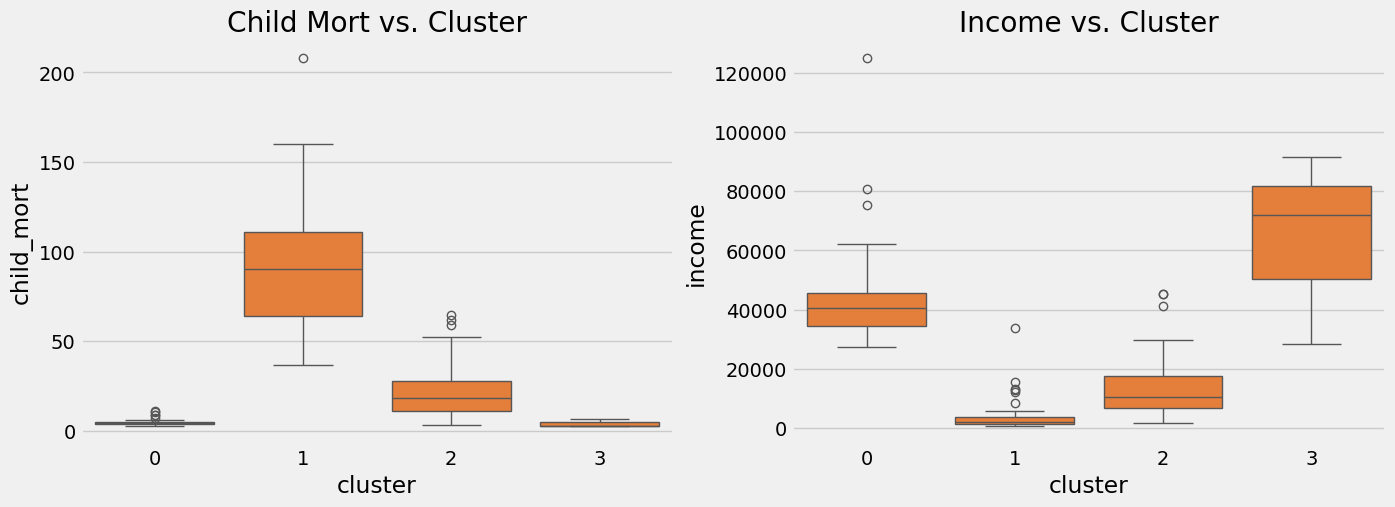

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'cluster', y = 'child_mort', data = df_kmeans_4, color = '#FF781F');
plt.title('Child Mort vs. Cluster')

plt.subplot(1,2,2)
sns.boxplot(x = 'cluster', y = 'income', data = df_kmeans_4, color = '#FF781F');
plt.title('Income vs. Cluster')

plt.show()

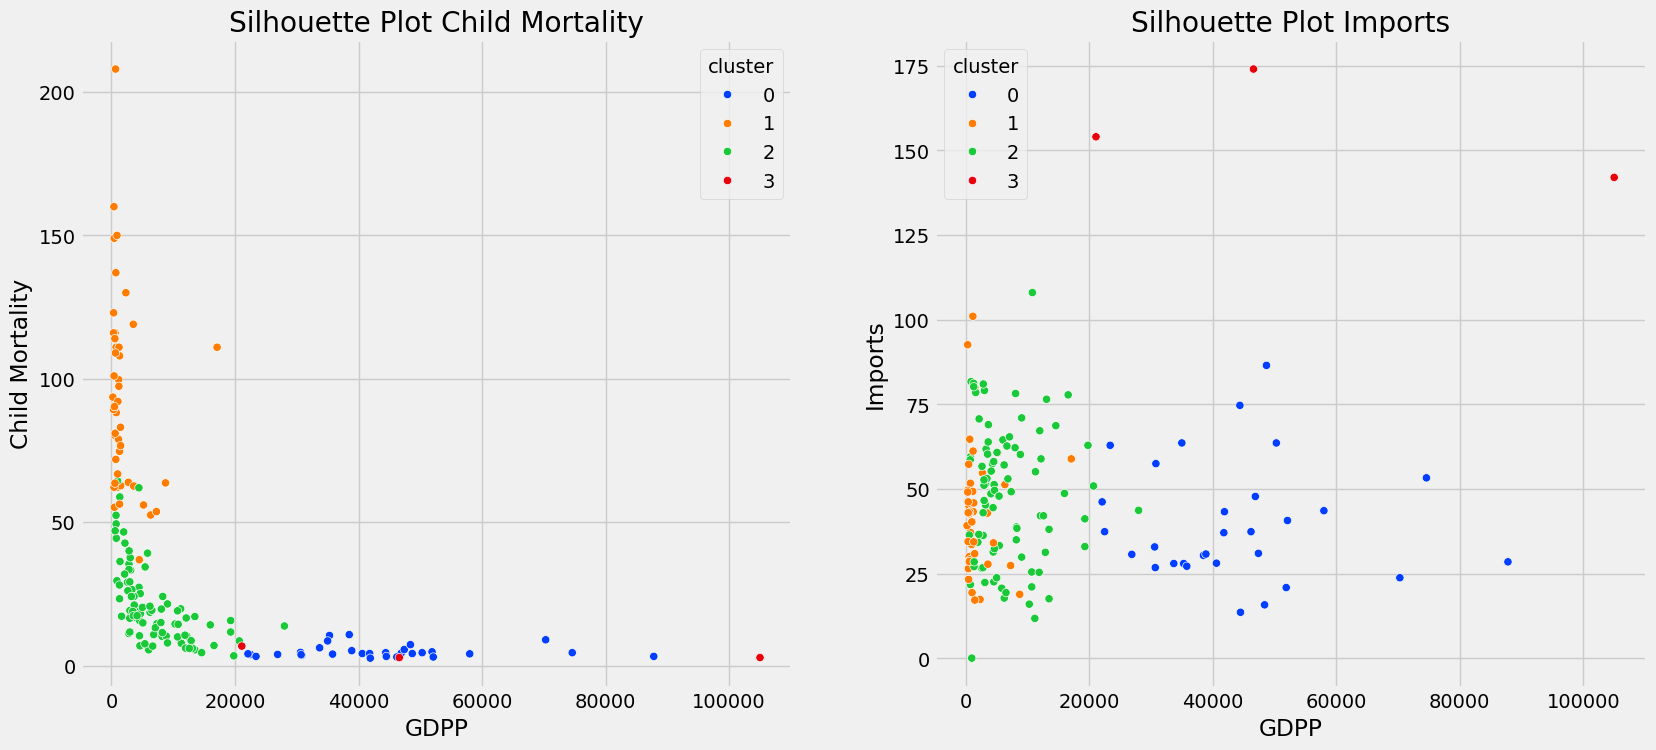

In [33]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = df_kmeans_4, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')

plt.subplot(1,2,2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = df_kmeans_4, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')

plt.show()

In [34]:
df_kmeans_3 = df.copy()

In [35]:
# K-Means with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(country_pca) # fit model with country_pca data

df_kmeans_3['cluster'] = kmeans_3.labels_
df_kmeans_3.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [36]:
df_kmeans_3['cluster'].value_counts()

1    84
0    47
2    36
Name: cluster, dtype: int64

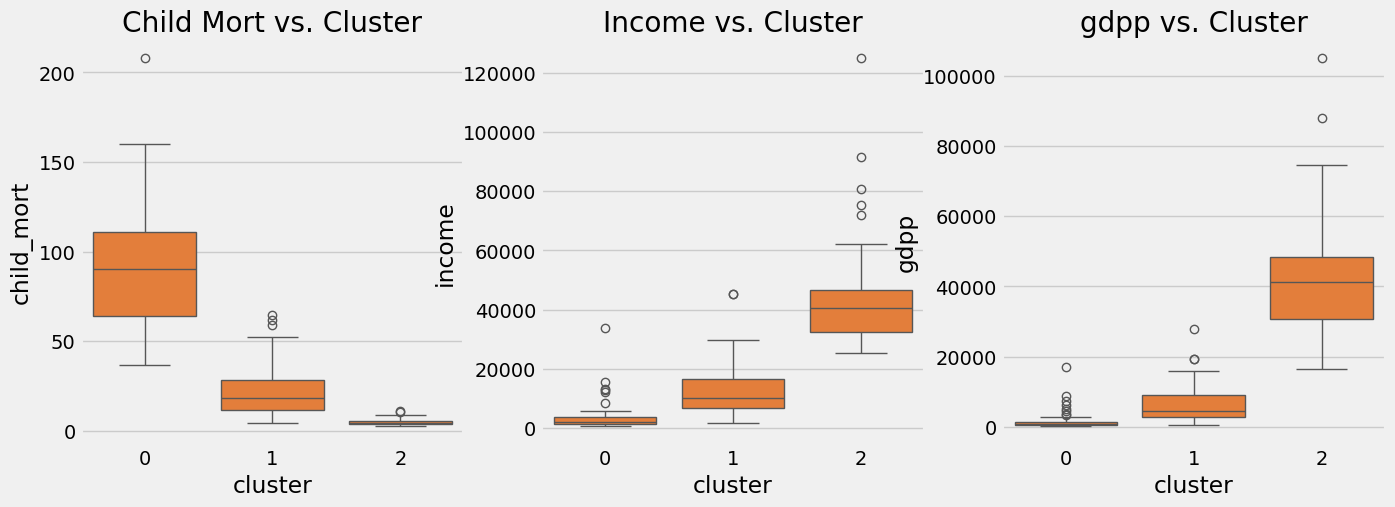

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'cluster', y = 'child_mort', data = df_kmeans_3, color = '#FF781F');
plt.title('Child Mort vs. Cluster')

plt.subplot(1,3,2)
sns.boxplot(x = 'cluster', y = 'income', data = df_kmeans_3, color = '#FF781F');
plt.title('Income vs. Cluster')

plt.subplot(1,3,3)
sns.boxplot(x = 'cluster', y = 'gdpp', data = df_kmeans_3, color = '#FF781F');
plt.title('gdpp vs. Cluster')
plt.show()

In [38]:
# Cluster profiling is based on major three factors: 1- Child Mortality / 2- Income / 3 - gdpp
# Creating a new DatafFrame for these variable along with the cluster:
df_cluster = df_kmeans_3[['child_mort', 'income', 'gdpp', 'cluster']]
df_cluster = df_cluster.groupby('cluster').mean()
df_cluster

,child_mort,income,gdpp
cluster,,,
0,92.961702,3942.404255,1922.382979
1,21.927381,12305.595238,6486.452381
2,5.000000,45672.222222,42494.444444


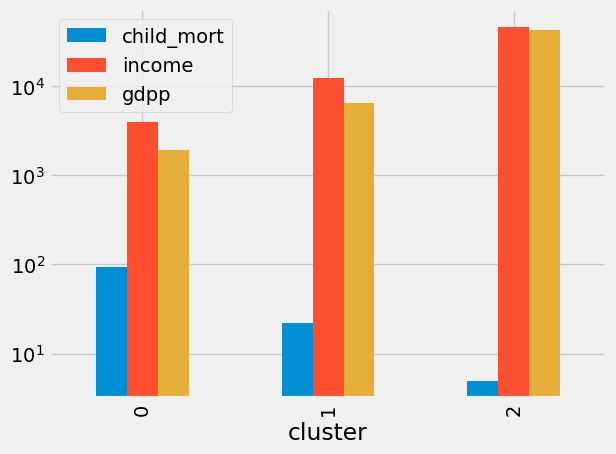

In [39]:
# Visualising the profiled variables of the dataset via barplot
df_cluster.plot(kind='bar', logy=True);

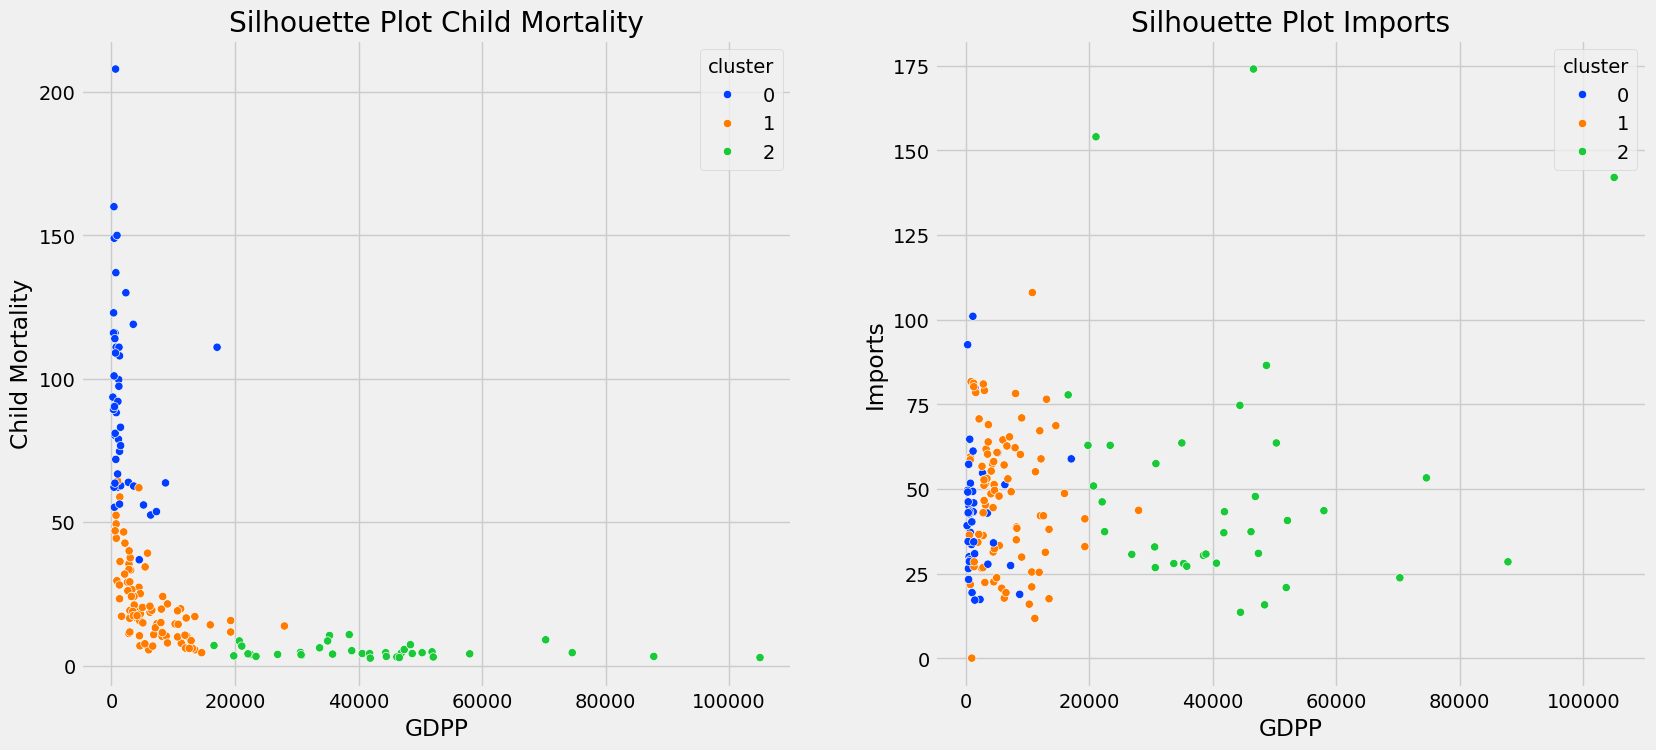

In [40]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = df_kmeans_3, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')

plt.subplot(1,2,2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = df_kmeans_3, hue = 'cluster', palette = 'bright')
plt.title('Silhouette Plot Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')

plt.show()

In [41]:
df_pair_plot = pd.DataFrame(reduced_cr,columns=['PC_' + str(i) for i in range(5)])

In [42]:
df_pair_plot['Cluster'] = kmeans_3.labels_
df_pair_plot.head()

,PC_0,PC_1,PC_2,PC_3,PC_4,Cluster
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1


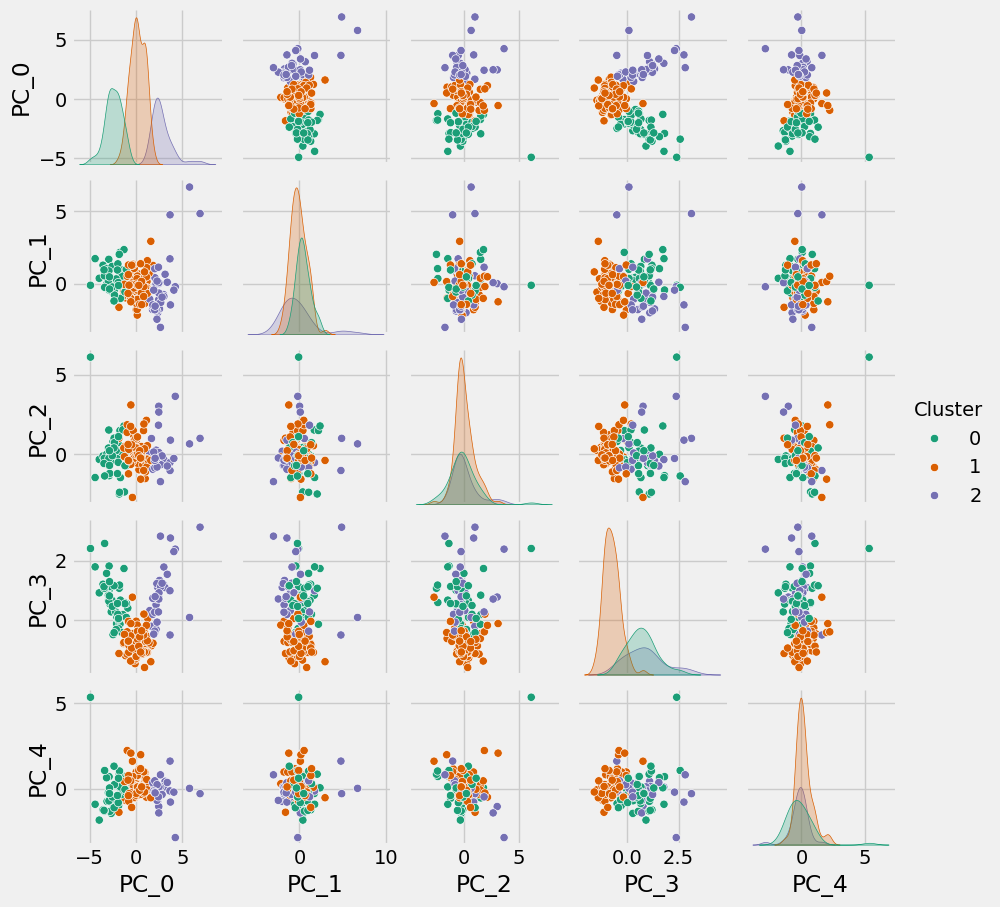

In [43]:
sns.pairplot(df_pair_plot, hue='Cluster', palette='Dark2', diag_kind='kde', height=1.85)

In [44]:
df_kmeans_3['cluster'].loc[df_kmeans_3['cluster'] == 0] = 'Help Needed'
df_kmeans_3['cluster'].loc[df_kmeans_3['cluster'] == 1] = 'Might Need Help'
df_kmeans_3['cluster'].loc[df_kmeans_3['cluster'] == 2] = 'No Help Needed'

fig = px.choropleth(df_kmeans_3[['country','cluster']],
                    locationmode='country names',
                    locations='country',
                    title='Needed Help Per Country',
                    color=df_kmeans_3['cluster'],
                    color_discrete_map={'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'}
                   )

fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(legend_title_text='Labels', legend_title_side='top', title_pad_l=260, title_y=0.86)
fig.show(engine='kaleido')

<ipython-input-44-2741ee8baa35>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
df_kmeans_3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Help Needed
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Might Need Help
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Might Need Help
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Help Needed
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Might Need Help
